In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [13]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import pickle as pkl
from IPython import display

import cv2

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:

os.chdir("/content/drive/My Drive/NN98/HW8")


In [6]:
# #(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
# with open('data.pkl','rb') as f:
#     training_images = pkl.load(f)

In [7]:
#!unzip GAN_Dataset.zip

In [8]:
#os.mkdir('./dataResize')

In [9]:
#os.mkdir('./dataResize2')

In [10]:
#!rm -rf dataResize2

# Resize data

In [ ]:
src = './data'
dataresize = './dataResize2'

for image in os.listdir(src):
  img = cv2.imread(os.path.join(src, image))
  img = cv2.resize(img, (128, 128))
  cv2.imwrite(os.path.join(dataresize, image), img)

# Convert RGBA to RGB

In [ ]:
from PIL import Image

In [ ]:
os.mkdir('./dataset2')

In [ ]:
src = './dataResize2'
dataset = './dataset2'

for image in os.listdir(src):
  img = Image.open(os.path.join(src, image))

  if img.mode == 'RGBA':
    img.load()
    new_img = Image.new('RGB',img.size,(0,0,0))
    new_img.paste(img, mask = img.split()[3])
    new_img.save(os.path.join(dataset, image.split('.')[0] + '.jpg'), 'JPEG')

  else:
    img.convert('RGB')
    img.save(os.path.join(dataset, image.split('.')[0] + '.jpg'), 'JPEG')

# code

In [15]:
from PIL import Image

src = './dataset2'
training_pokemon = []
dir_pic = os.listdir(src)
for pic in dir_pic:
    img = Image.open(os.path.join(src, pic))
    img = np.array(img)
    break

In [16]:
img.shape

(128, 128, 3)

In [17]:
noise = tf.random.normal([img.shape[0], img.shape[1], img.shape[2]], stddev= 1)
noise.shape

TensorShape([128, 128, 3])

In [18]:
m1 = img + noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


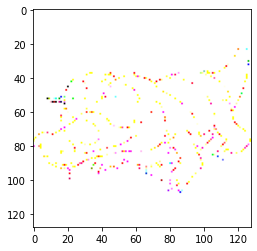

In [19]:
plt.imshow(m1, cmap="gray")
#plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()

In [20]:
#with noise
from PIL import Image

src = './dataset2'
training_pokemon = []
dir_pic = os.listdir(src)
for pic in dir_pic:
    img = Image.open(os.path.join(src, pic))
    img = np.array(img)
    noise = tf.random.normal([img.shape[0], img.shape[1], img.shape[2]], stddev= 0.3)
    img = img + noise
    #img = mpimg.imread(src + pic)
    #test = np.concatenate([img, first_img])
    #test2 = np.concatenate([test, img])
    training_pokemon.append(img)
    #print(img.shape)
    

In [ ]:
#without noise
from PIL import Image

src = './dataset2'
training_pokemon = []
dir_pic = os.listdir(src)
for pic in dir_pic:
    img = Image.open(os.path.join(src, pic))
    img = np.array(img)

    training_pokemon.append(img)
    #print(img.shape)
    

In [21]:
training_data = np.array(training_pokemon)
training_data.shape

(352, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


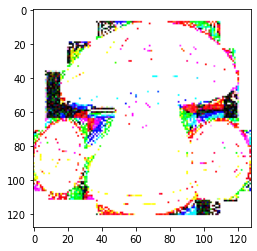

In [22]:
#for i in range(predictions.shape[0]):
      #plt.subplot(4, 4, i+1)
plt.imshow(training_data[111, :, :] , cmap="gray")
#plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()

# gen : MLP , disc : MLP

In [ ]:
def generator():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(256, input_dim = 100))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(0.2))

    #model.add(tf.keras.layers.Dense(512))
   #model.add(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.LeakyReLU(0.2))

    #model.add(tf.keras. layers.Dense(1024))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(49152, activation='tanh'))
    
    return model

In [ ]:
def discriminator():
    model = tf.keras.Sequential()
    #model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
    model.add(tf.keras.layers.Dense(1024, input_dim = 49152))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras.layers.Dense(512))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras. layers.Dense(256))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras.layers.Dense(64))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    return model

# gen : DCNN, disc : MLP

In [ ]:
def generator():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(16 * 16 * 64, input_shape = (100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((16, 16, 64))) # 16 16 64

    #model.add(tf.keras.layers.Conv2DTranspose(128, kernel_size= (5, 5), strides=(2, 2), padding= 'same')) # 16 16 1024
    #model.add(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.LeakyReLU(0.2))

    model.add(tf.keras.layers.Conv2DTranspose(128, kernel_size= (5, 5), strides=(2, 2), padding= 'same')) # 32 32 512
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(64, kernel_size= (5, 5), strides=(2, 2), padding= 'same')) # 64 64 256
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(3, kernel_size= (5, 5), strides=(2, 2), padding= 'same', activation= 'tanh')) # 128 128 3


    #model.add(tf.keras.layers.Dense(512))
   #model(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.LeakyReLU(0.2))

    #model.add(tf.keras. layers.Dense(1024))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras.layers.Dense(67500, activation='tanh'))
    
    return model

In [ ]:
def discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (128, 128, 3)))
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras.layers.Dense(512))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras. layers.Dense(256))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras.layers.Dense(64))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    return model

# gen: DCNN, disc: CNN

In [23]:
def generator():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(16 * 16 * 64, input_shape = (100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((16, 16, 64))) # 16 16 64

    #model.add(tf.keras.layers.Conv2DTranspose(128, kernel_size= (5, 5), strides=(2, 2), padding= 'same')) # 16 16 1024
    #model.add(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.LeakyReLU(0.2))

    model.add(tf.keras.layers.Conv2DTranspose(128, kernel_size= (5, 5), strides=(2, 2), padding= 'same')) # 32 32 512
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(64, kernel_size= (5, 5), strides=(2, 2), padding= 'same')) # 64 64 256
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(3, kernel_size= (5, 5), strides=(2, 2), padding= 'same', activation= 'tanh')) # 128 128 3


    #model.add(tf.keras.layers.Dense(512))
   #model(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.LeakyReLU(0.2))

    #model.add(tf.keras. layers.Dense(1024))
    #model.add(tf.keras.layers.LeakyReLU(0.2))
    #model.add(tf.keras.layers.Dense(67500, activation='tanh'))
    
    return model

In [24]:
def discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, kernel_size = (5, 5), strides =(2,2), padding= 'same', input_shape = (128, 128, 3)))
    model.add(tf.keras.layers.LeakyReLU())
    #model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, kernel_size = (5, 5),strides =(2,2), padding= 'same'))
    model.add(tf.keras.layers.LeakyReLU())
    #model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    
    return model

# create generator and discriminator

In [25]:
generator = generator()
discriminator = discriminator()


In [26]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [27]:
def discriminator_loss(real_image, fake_image):
    real_loss = cross_entropy(tf.ones_like(real_image), real_image)
    fake_loss = cross_entropy(tf.zeros_like(fake_image), fake_image)
    #total_loss = -tf.reduce_mean(tf.math.log(real_image) + tf.math.log(1. - fake_image))
    total_loss = real_loss + fake_loss
    return total_loss

In [28]:
def generation_loss(fake_image):
    
    fake_loss = cross_entropy(tf.ones_like(fake_image), fake_image)
    #fake_loss = -tf.reduce_mean(tf.math.log(fake_image))
    return fake_loss

In [29]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4)


In [30]:
noise_dim = 100
#epochs = 10
BATCH_SIZE = 64
num_examples_to_generate = 100
BUFFER_SIZE = 352

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


# train step for MLP-MLP

In [ ]:
@tf.function
def train_step(images):
    
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        
        generator_image = generator(noise, training = True)
        #generator_image = tf.reshape(generator_image, shape=(BATCH_SIZE, 28, 28, 1))
        #print(images.shape)
        images = tf.reshape(images, shape = (images.shape[0], images.shape[1] * images.shape[2] * images.shape[3]))
        fake_output = discriminator(generator_image, training = True)
        real_output = discriminator(images, training = True)
        
        gen_loss = generation_loss(fake_output)
        #print(images.shape)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

        return gen_loss, disc_loss


# Train step for DCNN-MLP and DCNN-CNN

In [31]:
@tf.function
def train_step(images):
    
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        
        generator_image = generator(noise, training = True)
        #generator_image = tf.reshape(generator_image, shape=(BATCH_SIZE, 28, 28, 1))
        #print(images.shape)
        #images = tf.reshape(images, shape = (images.shape[0], images.shape[1] * images.shape[2] * images.shape[3]))
        fake_output = discriminator(generator_image, training = True)
        real_output = discriminator(images, training = True)
        
        gen_loss = generation_loss(fake_output)
        #print(images.shape)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

        return gen_loss, disc_loss


#Train model

In [32]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [34]:
generator_losses = []
discriminator_losses = []

def train(dataset, epochs):
    
    for epoch in range(epochs):
        start = time.time()

        for image in dataset:
            #image = tf.reshape(image, shape=(BATCH_SIZE, 784))
            gen_loss, disc_loss = train_step(image)
        generator_losses.append(gen_loss)
        discriminator_losses.append(disc_loss)

        print('epoch : {}, Loss generator {} and Loss discriminator {}.'.format(epoch + 1, gen_loss.numpy(), disc_loss.numpy()))

        #generate_and_save_images(generator, epoch + 1, seed)
            
                
        if (epoch + 1) % 100 == 0:
              generate_and_save_images(generator, epoch, seed)
              checkpoint.save(file_prefix = checkpoint_prefix)

        #print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
    
    #generate_and_save_images(generator, epochs, seed)


In [35]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  #predictions = tf.reshape(predictions, shape=(predictions.shape[0], 128, 128, 3))
  #print(predictions.shape)
  fig = plt.figure(figsize=(10,10))

  for i in range(predictions.shape[0]):
      plt.subplot(10, 10, i+1)
      plt.imshow((predictions[i, :, :, :] +1) /2, cmap="gray")
      plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()
  #return predictions


In [36]:
#train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32")
training_data = (training_data -127.5) / 127.5

#np.min(training_data)

In [37]:
dataset = tf.data.Dataset.from_tensor_slices(training_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

epoch : 1, Loss generator 1.2666103839874268 and Loss discriminator 0.3902033567428589.
epoch : 2, Loss generator 3.3938961029052734 and Loss discriminator 0.06539908051490784.
epoch : 3, Loss generator 2.351956605911255 and Loss discriminator 0.1042373925447464.
epoch : 4, Loss generator 3.27164888381958 and Loss discriminator 0.08044933527708054.
epoch : 5, Loss generator 2.903709650039673 and Loss discriminator 0.16435471177101135.
epoch : 6, Loss generator 5.151705741882324 and Loss discriminator 0.011120722629129887.
epoch : 7, Loss generator 5.614390850067139 and Loss discriminator 0.007614636793732643.
epoch : 8, Loss generator 5.578246116638184 and Loss discriminator 0.006250758655369282.
epoch : 9, Loss generator 5.593807220458984 and Loss discriminator 0.0047519514337182045.
epoch : 10, Loss generator 5.9896440505981445 and Loss discriminator 0.0025597845669835806.
epoch : 11, Loss generator 5.5278825759887695 and Loss discriminator 0.006065002642571926.
epoch : 12, Loss gene

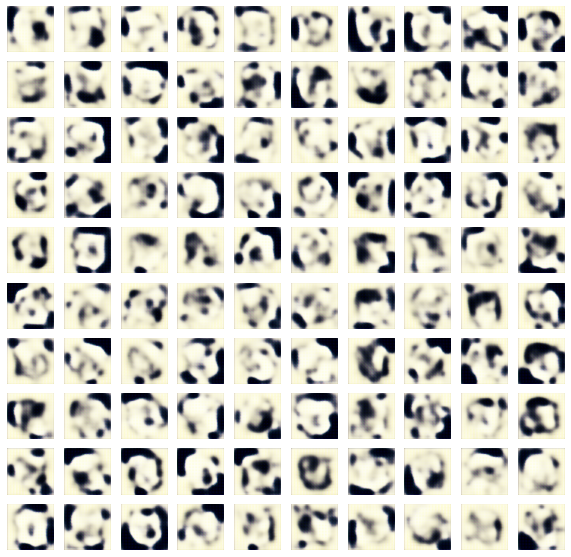

epoch : 101, Loss generator 12.187372207641602 and Loss discriminator 0.021665401756763458.
epoch : 102, Loss generator 8.64039421081543 and Loss discriminator 0.11598685383796692.
epoch : 103, Loss generator 4.560068130493164 and Loss discriminator 0.2827318608760834.
epoch : 104, Loss generator 1.5169308185577393 and Loss discriminator 1.0587159395217896.
epoch : 105, Loss generator 11.742195129394531 and Loss discriminator 0.004327808506786823.
epoch : 106, Loss generator 5.273046493530273 and Loss discriminator 0.5364842414855957.
epoch : 107, Loss generator 4.252162456512451 and Loss discriminator 0.5340738296508789.
epoch : 108, Loss generator 14.818138122558594 and Loss discriminator 0.07898307591676712.
epoch : 109, Loss generator 5.310782432556152 and Loss discriminator 0.1371932178735733.
epoch : 110, Loss generator 8.186604499816895 and Loss discriminator 0.02984372340142727.
epoch : 111, Loss generator 5.851458549499512 and Loss discriminator 0.13238786160945892.
epoch : 11

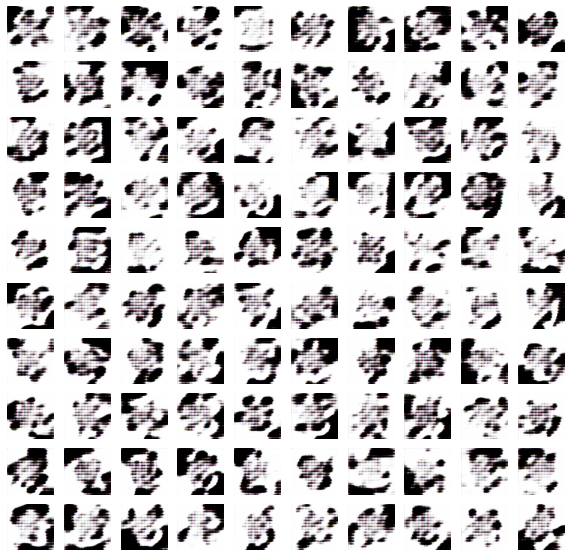

In [38]:
train(dataset, 200)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


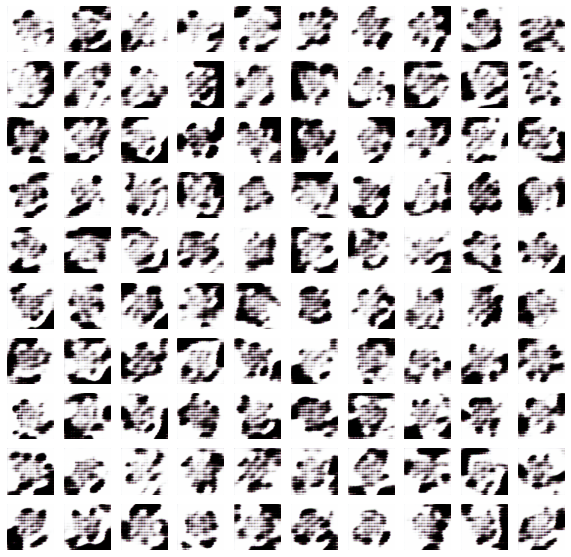

In [40]:
noise_dim = 100
#epochs = 10
#BATCH_SIZE = 64
num_examples_to_generate = 100
#BUFFER_SIZE = 352

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim]) 
def generate_and_save_images_100(model, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  #predictions = tf.reshape(predictions, shape=(predictions.shape[0], 128, 128, 3))
  #print(predictions.shape)
  fig = plt.figure(figsize=(10,10))

  for i in range(predictions.shape[0]):
      plt.subplot(10, 10, i+1)
      plt.imshow((predictions[i, :, :, :] +1) /2, cmap="gray")
      plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()
  #return predictions
generate_and_save_images_100(generator, seed)

In [ ]:
with open('data_pred.pkl','wb') as f:
      pkl.dump(pred, f)

In [ ]:
with open('data_gen.pkl','wb') as f:
         pkl.dump(generator_losses, f)
with open('data_disc.pkl','wb') as f:
         pkl.dump(discriminator_losses, f)



In [ ]:
with open('data_gen.pkl','rb') as f:
    loss_gen = pkl.load(f)

with open('data_disc.pkl','rb') as f:
    loss_disc = pkl.load(f)

#with open('data_pred.pkl','rb') as f:
    #pred = pkl.load(f)

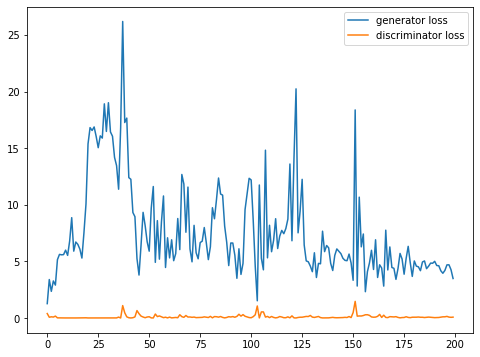

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(generator_losses, label = 'generator loss')
plt.plot(discriminator_losses, label = 'discriminator loss')
plt.legend()
plt.show()